# Chapter 10 - Working With Unlabeled Data - Clustering Analysis

The goal of clustering is to find natural grouping in  data so that items in the same cluster are more similar to each other than tose from differnet clusters.

## Grouping Objects By Similariy Using K-means

### K-means Clustering Using Scikit-Learn

The K-means algorithm belongs to the category of **prototype based clustering**. There's two other categories **density based clustering** and **hierarchical**

Prototype based clustering means that each cluster is represented by a prototype, which is usually either the **centroid** (average) of similar points with continuous features, or the **medoid** (the more representative or the point that minimizes the distance to all other points that beling to a particular cluster) in the case of categorical variables.

One of the drawbacks of k-means is that we have to specify the number of clusters k, a priori. 

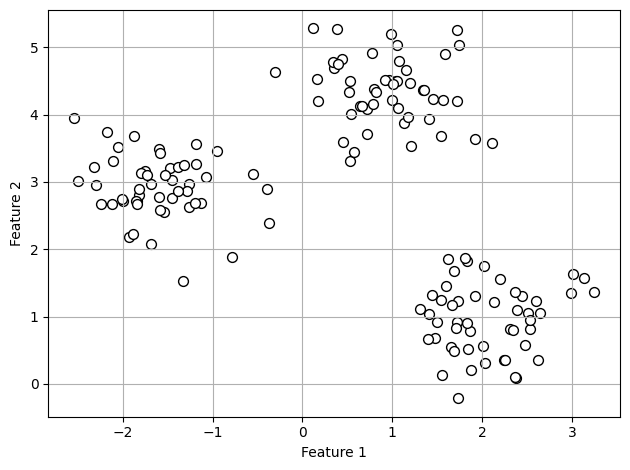

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                    n_features=2,
                    centers=3,
                    cluster_std=0.5,
                    shuffle=True,
                    random_state=0)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

The k-means algorithm is summarized in the following steps:

1. Randomly pick k centroids from the examples as initial cluster centers

2. Assign each example to the nearest centroid.

3. Move the centroids to the center of the examples that were assigned to it.

4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or max number of iterations is reached.

How do we measure similarity between objects?

We can define similarity as the oppsite of distance, and a commonly used distance for clustering examples with continuous features is the **Squared Euclidean Distance** between two points x and y in m-dimensional space. Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within cluster **sum of square errors (SSE)**

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04, # tolerance for convergence criterion (sum of squared distances) 
            random_state=0)
y_km = km.fit_predict(X)

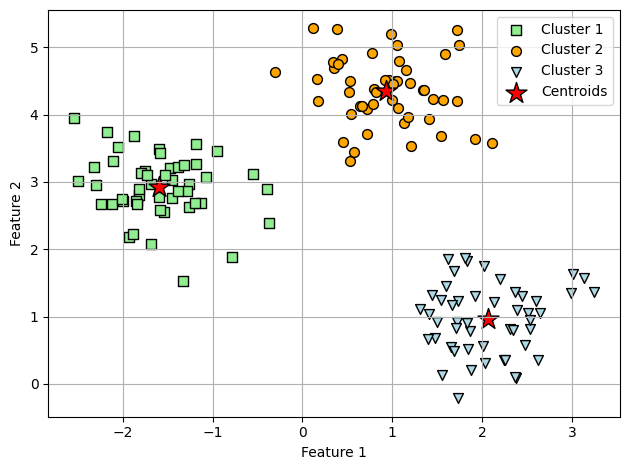

In [3]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Although k-means worked well on this toy dataset, we still have the drawback of having to specify the number of clusters, k, a priori. The number of clusters t ochoose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized. The other properties of k-means are that clusters do not overlap and are not hierarchical, and we also assume that there is at least one item in each cluster 

### A Smarter Way of Placing The Initial Cluster Centroids Using k-means++

One way of addressing the issue of choosing the value for k is to run the k-means algorithm multiple times on a datset and choose the best performing model in terms of the SSE.

Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.

The initialization in k-means++ can be summarized as follows:

1. Initialize an empty set, M, to store the k centroids being selected.

2. Randomly choose the first centroid from the input examples and asign it to M.

3. For each example, x, that is not M, find the minimum squared distance to any of the centroids in M.

4. To randomly select the next centroid, use a weighted probability distribution.

5. Repeat steps 3 and 4 until k centroids are chosen. 

6. Proceed with the classic k-means algorithm.


### Hard Versus Soft Clustering

**Hard clustering** describes a family of algorithms where each example in a dataset is assigned to exactly one cluster, as in the k means and k means++. In contrast, algorithms for **soft clustering** (sometimes called **fuzzy clutering**) assign an example to one or more clusters. A popular example of soft clustering is the **fuzzy C-means (FCM)** algorithm.

The FCM procedure is very similar to k-means. However, we replace the hard cluster assignment with probabilities for each point belonging to each cluster.

As with the k-means algorithm, we can summarize the FCM algorithm in four key steps:

1. Specify the number of k centroids and randomly assign the cluster memberships for each point

2. Compute the cluster centroids, 𝝁𝝁(𝑗𝑗),𝑗𝑗 𝑗 {1, … , 𝑘𝑘}

3. Update the cluster memberships for each point

4. Repeat steps 2 and 3 until the membership coefficients do not change or a user-defined tolerance or maximum number of iterations is reached

### Using The Elbow Method to Find the Optimal Number Of Clusters

To quantify the quality of clustering, we need to use intrinsic metrics, such as the within cluster SSE (distortion) - to compare the performance of differnet k-means clustering models. 

In [4]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters, k, for a given task. We can say that if k increases, the distortion will decrease. This is because the examples will be closer to the centroids they are assigned to. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly, which will become clearer if we plot the distortion for different values of k

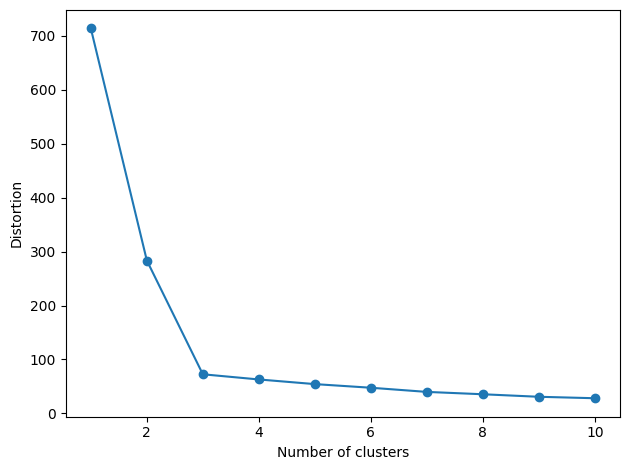

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### Quantifying The Quality Of Clustering Via Silhouette Plots

Another intrinsic metric to evaluate the quality of a clustering is **silhouette analysis**. It can be used as a geographical tool to plot a measure of how tightly grouped the examples in the clusters are. To calculate the **silhouette coefficient** of a single example in out dataset, we can apply the following three steps:

1. Calculate the cluster cohesion, a(i), as the average distance between an example, x(i) , and all other points in the same cluster.
2. Calculate the cluster separation, b(i), from the next closest cluster as the average distance between the example, x(i), and all examples in the nearest cluster.
3. Calculate the silhouette, s(i), as the difference between cluster cohesion and separation divided by the greater of the two

The silhouette coefficient is bounded in the range –1 to 1.

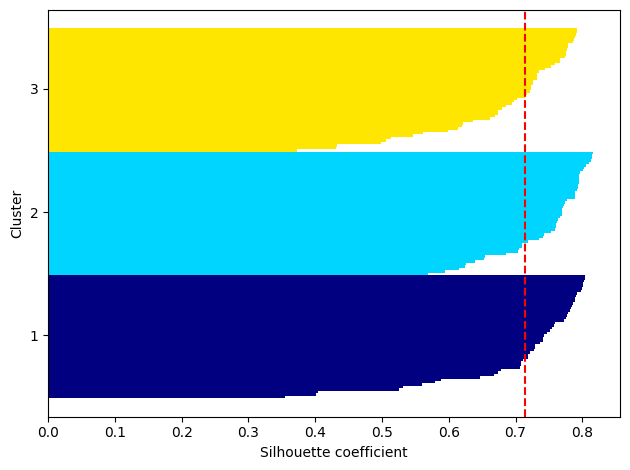

In [8]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
                            X, y_km, metric='euclidean'
                            )
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

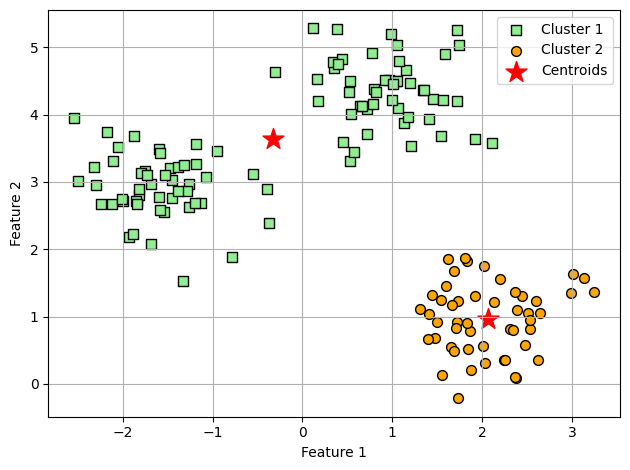

In [9]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

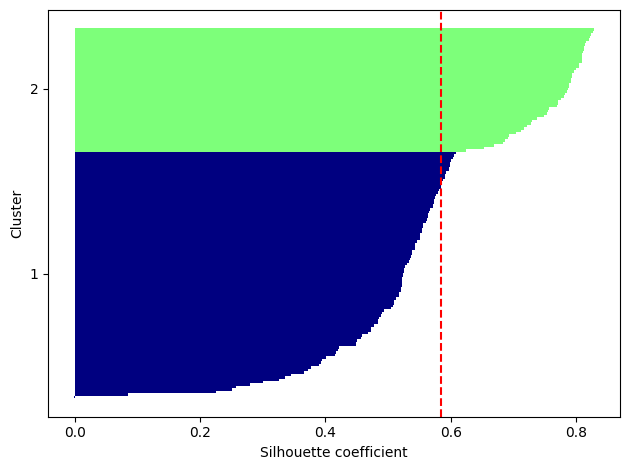

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
                    X, y_km, metric='euclidean'
                    )

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

## Organizing Clusters As a Hierarchical Tree

One advantage of the hierarchical clustering algorithm is that it allows us to plot **dendrograms** (visualizations of a binary hierarchical clustering), which can help with the interpretation of the results by by creating meaningful taxonomies. Another advantage is that we do not need to specify the number of clusters upfront.

The two main approaches to hierarchical clustering are **agglometative** and **divisive** hierarchical clustering. In diviside hierarchical clustering, we start with one cluster until each cluster only contains one example. Agglometative clustering takes the opposite approach, we start with each example as an individual cluster and merge the closest pairs of clusters until only one cluster remains.

### Grouping Clusters in a Bottom-Up Fashion

The two standart algorithms for agglomerative hierarchical clustering are **single linkage** and **complete linkage**. Using single linkage, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distnce between the most similar members is the smallest. The complete linkage approach is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge. 

![Alt text](../images/25.png)

Hierarchical complete linkage clustering is an iterative procedure that can be summarized by the following steps:

1. Compute a pair-wise distance matrix of all examples.

2. Represent each data point as a singleton cluster.

3. Merge the two closest clusters based on the distance between the most dissimilar (distant)
members.

4. Update the cluster linkage matrix.

5. Repeat steps 2-4 until one single cluster remains

In [11]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### Performing Hierarchical Clustering On a Distance Matrix

In [12]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [13]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

Based on the function description, we understand that we can use a condensed distance matrix (upper triangular) from the pdist function as an input attribute. Alternatively, we could also provide the initial data array and use the 'euclidean' metric as a function argument in linkage. However, we should not use the squareform distance matrix that we defined earlier, since it would yield different distance values than expected. To sum it up, the three possible scenarios are listed here:

• Incorrect approach: Using the squareform distance matrix as shown in the following code
snippet leads to incorrect results:

In [14]:
row_clusters = linkage(row_dist,
                        method='complete',
                        metric='euclidean')

/tmp/ipykernel_2370942/3670906318.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist,


• Correct approach: Using the condensed distance matrix as shown in the following code example yields the correct linkage matrix:

In [15]:
row_clusters = linkage(pdist(df, metric='euclidean'),
                        method='complete')

Correct approach: Using the complete input example matrix (the so-called design matrix)
as shown in the following code snippet also leads to a correct linkage matrix similar to the
preceding approach:

In [16]:
row_clusters = linkage(df.values,
                        method='complete',
                        metric='euclidean')

In [17]:
pd.DataFrame(row_clusters,
            columns=['row label 1',
            'row label 2',
            'distance',
            'no. of items in clust.'],
            index=[f'cluster {(i + 1)}' for i in
            range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


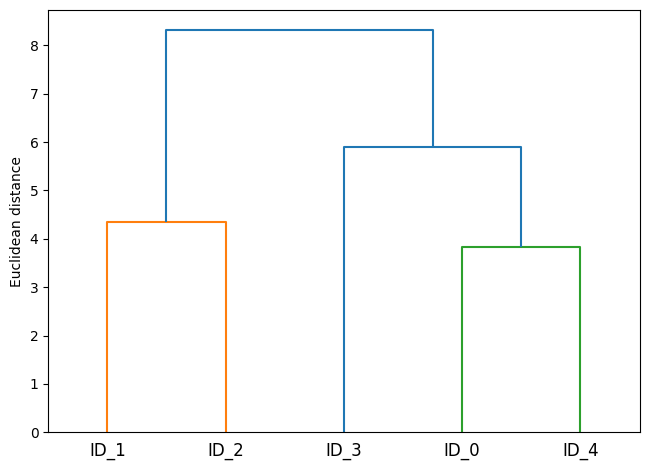

In [18]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(
                row_clusters,
                labels=labels,
                # make dendrogram black (part 2/2)
                # color_threshold=np.inf
                )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### Attaching Dendograms To a Heat Map

In practical applications, hierarchical clustering dendrograms are often used in combination with a **heat map**, which allows us to represent the individual values in the data array or matrix containing our training examples with a color code.

However, attaching a dendrogram to a heat map can be a little bit tricky, so let’s go through this procedure step by step:

1. We create a new figure object and define the x axis position, y axis position, width, and height of the dendrogram via the add_axes attribute. Furthermore, we rotate the dendrogram 90
degrees counterclockwise. The code is as follows:

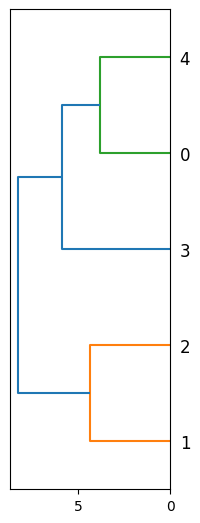

In [25]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
                        orientation='left')

2. Next, we reorder the data in our initial DataFrame according to the clustering labels that can be accessed from the dendrogram object, which is essentially a Python dictionary, via the leaves key. The code is as follows:

In [22]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

3. Now, we construct the heat map from the reordered DataFrame and position it next to the
dendrogram:

In [23]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                interpolation='nearest',
                cmap='hot_r')

4. Finally, we modify the aesthetics of the dendrogram by removing the axis ticks and hiding
the axis spines. Also, we add a color bar and assign the feature and data record names to the
x and y axis tick labels, respectively:

In [24]:
axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

/tmp/ipykernel_2370942/4114494905.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipykernel_2370942/4114494905.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


### Applying Agglomerative Clustering Via Scikit-Learn

In [29]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                                linkage='complete',
                                )
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [31]:
ac = AgglomerativeClustering(n_clusters=2,
                                linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


## Locating regions of high density via DBSCAN

**Density-based spatial clustering of applications with noise (DBSCAN)**, which does not make assumptions about spherical clusters like k-means, nor does it partition the dataset into hierarchies that require a manual cut-off point. As its name implies, density-based clustering assigns cluster labels based on dense regions of points. In DBSCAN, the notion of density is defined as the number of points within a specified radius, 𝜀𝜀.

According to the DBSCAN algorithm, a special label is assigned to each example (data point) using the following criteria:
• A point is considered a core point if at least a specified number (MinPts) of neighboring points fall within the specified radius, 𝜀𝜀

• A border point is a point that has fewer neighbors than MinPts within 𝜀𝜀, but lies within the 𝜀𝜀 radius of a core point

• All other points that are neither core nor border points are considered noise points

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two simple steps:
1. Form a separate cluster for each core point or connected group of core points. (Core points
are connected if they are no farther away than 𝜀𝜀.)
2. Assign each border point to the cluster of its corresponding core point.

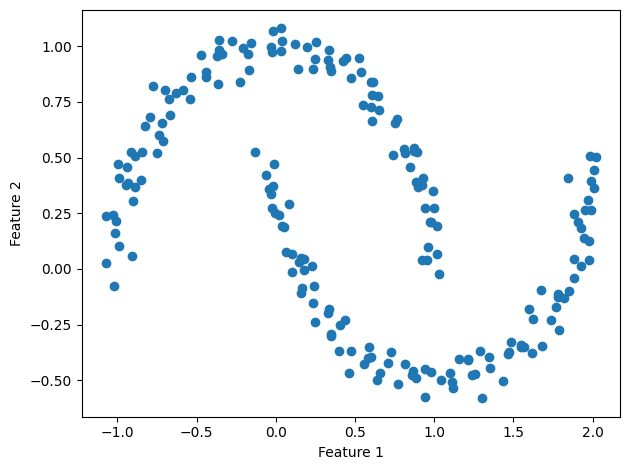

In [32]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
                    noise=0.05,
                    random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

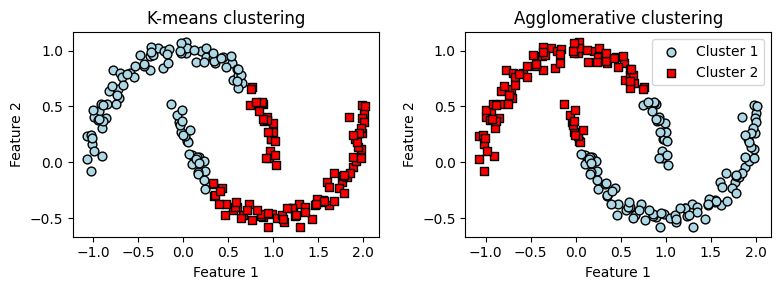

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2,
            random_state=0)

y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2,
                            linkage='complete',
                            )

y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')

ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')

ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

Finally, let’s try the DBSCAN algorithm on this dataset to see if it can find the two half-moon-shaped clusters using a density-based approach:

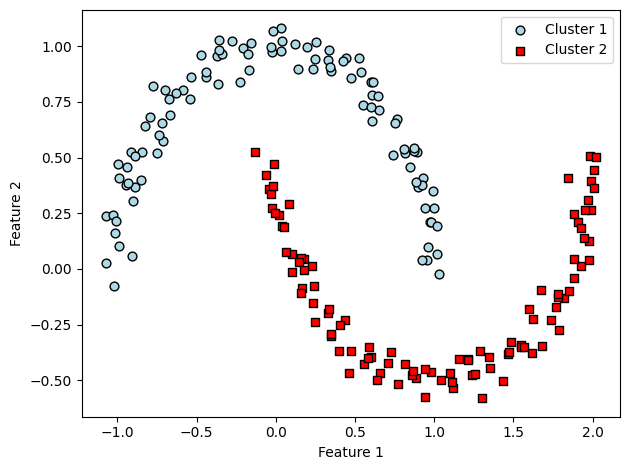

In [35]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')

plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

With an increasing number of features in our dataset—assuming a fixed number of training examples—the negative effect of the curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance metric. However, the problem of the curse of dimensionality is not unique to DBSCAN: it also affects other clustering algorithms that use the Euclidean distance metric, for example, k-means and hierarchical clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and 𝜀𝜀) that need to be optimized to yield good clustering results. Finding a good combination of MinPts and 𝜀𝜀 can be problematic if the density differences in the dataset are relatively large